# Title: AIDI 1002 Final Term Project Report

#### Members' Names or Individual's Name: Shang-Heng Wu and Kuan-Han Fu

####  Emails: 200573777@student.georgianc.on.ca and 200559801@student.georgianc.on.ca

# **Introduction:**
In the realm of computer vision and machine learning, object detection is a critical area of research and application. This study focuses on improving the accuracy of YOLOv8, a leading object detection model, specifically tailored for recognizing the Taiwanese singer Jay Chou. The challenge lies in optimizing the model to accurately identify and classify images of Jay Chou in varied environments and conditions.

#### **Problem Description:**
The primary issue addressed in this research is the need for enhanced accuracy in the YOLOv8 model when detecting Jay Chou in diverse datasets. This problem is significant due to the complexities involved in identifying specific individuals across different backgrounds, lighting conditions, and occlusions.

#### **Context of the Problem:**
This problem is crucial in the field of automated celebrity recognition, where precision and reliability are paramount. The ability to accurately identify individuals like Jay Chou has applications in media, entertainment, security, and digital marketing, making it a significant area of study.

#### **Limitation About Other Approaches:**
Previous approaches to this challenge often struggled with overfitting, limited generalization to new data, and insufficient robustness against varied backgrounds and occlusions. These limitations hindered their practical applicability in real-world scenarios.

#### **Solution:**
This study proposes a method of tuning hyperparameters in the YOLOv8 model to enhance its accuracy in recognizing Jay Chou. By systematically adjusting parameters such as learning rate, batch size, and anchor box sizes, the model can better learn the distinguishing features of the subject. This approach aims to improve the model's generalization capabilities and its robustness against diverse backgrounds and challenging conditions, thereby offering a more reliable and efficient solution for celebrity recognition tasks.

# Background

Explain the related work using the following table

| Model/Reference           | Explanation                                                                 | Dataset/Input                                  | Weakness                                                 |
|---------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------|----------------------------------------------------------|
| RCNN Ross/[Girshick et al.](https://arxiv.org/pdf/1311.2524.pdf)| Revolutionized object detection by using regions with CNN features         | PASCALVOC2010-12 mAP: 62.9%|It still takes a huge amount of time to train the network as you would have to classify 2000 region proposals per image.|
| FastRCNN/[Girshick et al.](https://arxiv.org/pdf/1504.08083.pdf)| Improved RCNN by sharing computation across region proposals               | PASCALVOC2010-12 mAP: 68.8%| Still reliant on selective search for region proposals, limiting speed |
| FasterRCNN/[Shaoqing Ren et al.](https://arxiv.org/pdf/1506.01497.pdf)| Introduced Region Proposal Networks (RPN) to replace selective search in FastRCNN |PASCALVOC2010-12 mAP:73.2%| More complex architecture; can be challenging to train and optimize |
| YOLOv1/[Redmon et al.](https://arxiv.org/pdf/1506.02640v5.pdf)      | Pioneered the approach of a single neural network for object detection     | PASCALVOC2010-12 mAP:66.4%| Less accurate in detecting small objects compared to region-based methods |
| YOLOv2/(YOLO9000)/[Redmon et al.](https://openaccess.thecvf.com/content_cvpr_2017/papers/Redmon_YOLO9000_Better_Faster_CVPR_2017_paper.pdf)| Improved speed and accuracy over YOLOv1, with better utilization of anchor boxes | PASCALVOC2010-12 mAP:78.6%| Sometimes struggled with overlapping objects|
| YOLOv3/[Redmon et al.](https://arxiv.org/pdf/1804.02767.pdf)| Further improvements in speed and accuracy, better at detecting smaller objects | COCO dataset mAP:57.9%| Trade-off between speed and accuracy, not as good in detecting very small objects |
| YOLOv4/[Bochkovskiy et al.](https://arxiv.org/pdf/2004.10934.pdf)| Enhanced accuracy and efficiency, integrating various new techniques and architectures | MSCOCOdataset(testdev2017) mAP:43.0%| Requires high computational power for optimal performance |
| YOLOv5/No paper| Not an official version from the original YOLO creators, but an improvement in terms of ease of use and deployment | COCO2017 mAP:49.0%| Lack of an official research paper or publication        |
| YOLOv6/[Li et al.](https://arxiv.org/pdf/2209.02976.pdf)| Similar to YOLOv5, it's an iteration by the community focusing on practical deployment | COCO2017 mAP:52.5% | Not officially part of the YOLO series, potential issues with standardization and benchmarking |
| YOLOv7/[Wang et al.](https://openaccess.thecvf.com/content/CVPR2023/papers/Wang_YOLOv7_Trainable_Bag-of-Freebies_Sets_New_State-of-the-Art_for_Real-Time_Object_Detectors_CVPR_2023_paper.pdf)| Community-driven version focusing on enhancing training and inference speed | COCO2017 mAP:52.9%| Not an official release, potential inconsistencies with previous YOLO methodologies |
| YOLOv8/[Reis et al.](https://arxiv.org/pdf/2305.09972.pdf)| Latest in the YOLO series with improvements in accuracy and efficiency    | COCO2017 mAP:68.5%| As a very recent model, it may have yet-to-be-discovered weaknesses or areas for improvement |

# Methodology

**Architecture Overview:**

- **Backbone and Head:** The architecture of YOLOv8 is divided into two main parts: the backbone and the head. The backbone is based on a modified version of the CSPDarknet53 architecture, which consists of 53 convolutional layers and incorporates cross-stage partial connections to facilitate better information flow between layers. The head of the model comprises multiple convolutional layers followed by a series of fully connected layers, which are tasked with predicting bounding boxes, objectness scores, and class probabilities for detected objects​​​​.
![Architecture overview of YOLOv8](images/Backbone.png "Architecture overview of YOLOv8")

- **Self-Attention Mechanism:** A key feature of YOLOv8's head is the incorporation of a self-attention mechanism. This allows the model to focus on different parts of the image, adjusting the importance of various features based on their relevance to the object detection task​​.

- **Multi-Scaled Object Detection:** YOLOv8 is designed to perform multi-scaled object detection using a feature pyramid network. This network consists of multiple layers that detect objects at different scales, enabling the model to effectively identify both large and small objects within an image​


> The below figure represents the comparison of YOLOv8 with the previous YOLO series.
![Architecture overview of YOLOv8](https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/yolo-comparison-plots.png "Architecture overview of YOLOv8")


# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

In [ ]:
# Set UTF-8 encoding.
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# Check NVIDIA GPU status
!nvidia-smi

Fri Dec 15 20:09:08 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Install Ultralytics YOLO package
!pip install ultralytics
# Install Roboflow package
!pip install roboflow

In [ ]:
# import packages and the YOLO package
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
# Clear the output to tidy up notebook
display.clear_output()

In [ ]:
from roboflow import Roboflow
# Replace with your actual API key
rf = Roboflow(api_key="your_api_key")  
project = rf.workspace("your_workspace").project("your_project")
# Download dataset
dataset = project.version(1).download("yolov8")

In [ ]:
# Train model with SGD optimizer
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=163 imgsz=640 patience=20 optimizer='SGD'

In [ ]:
# Train model with AdamW optimizer
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=300 imgsz=640 optimizer='AdamW' lr0=0.001 patience=100

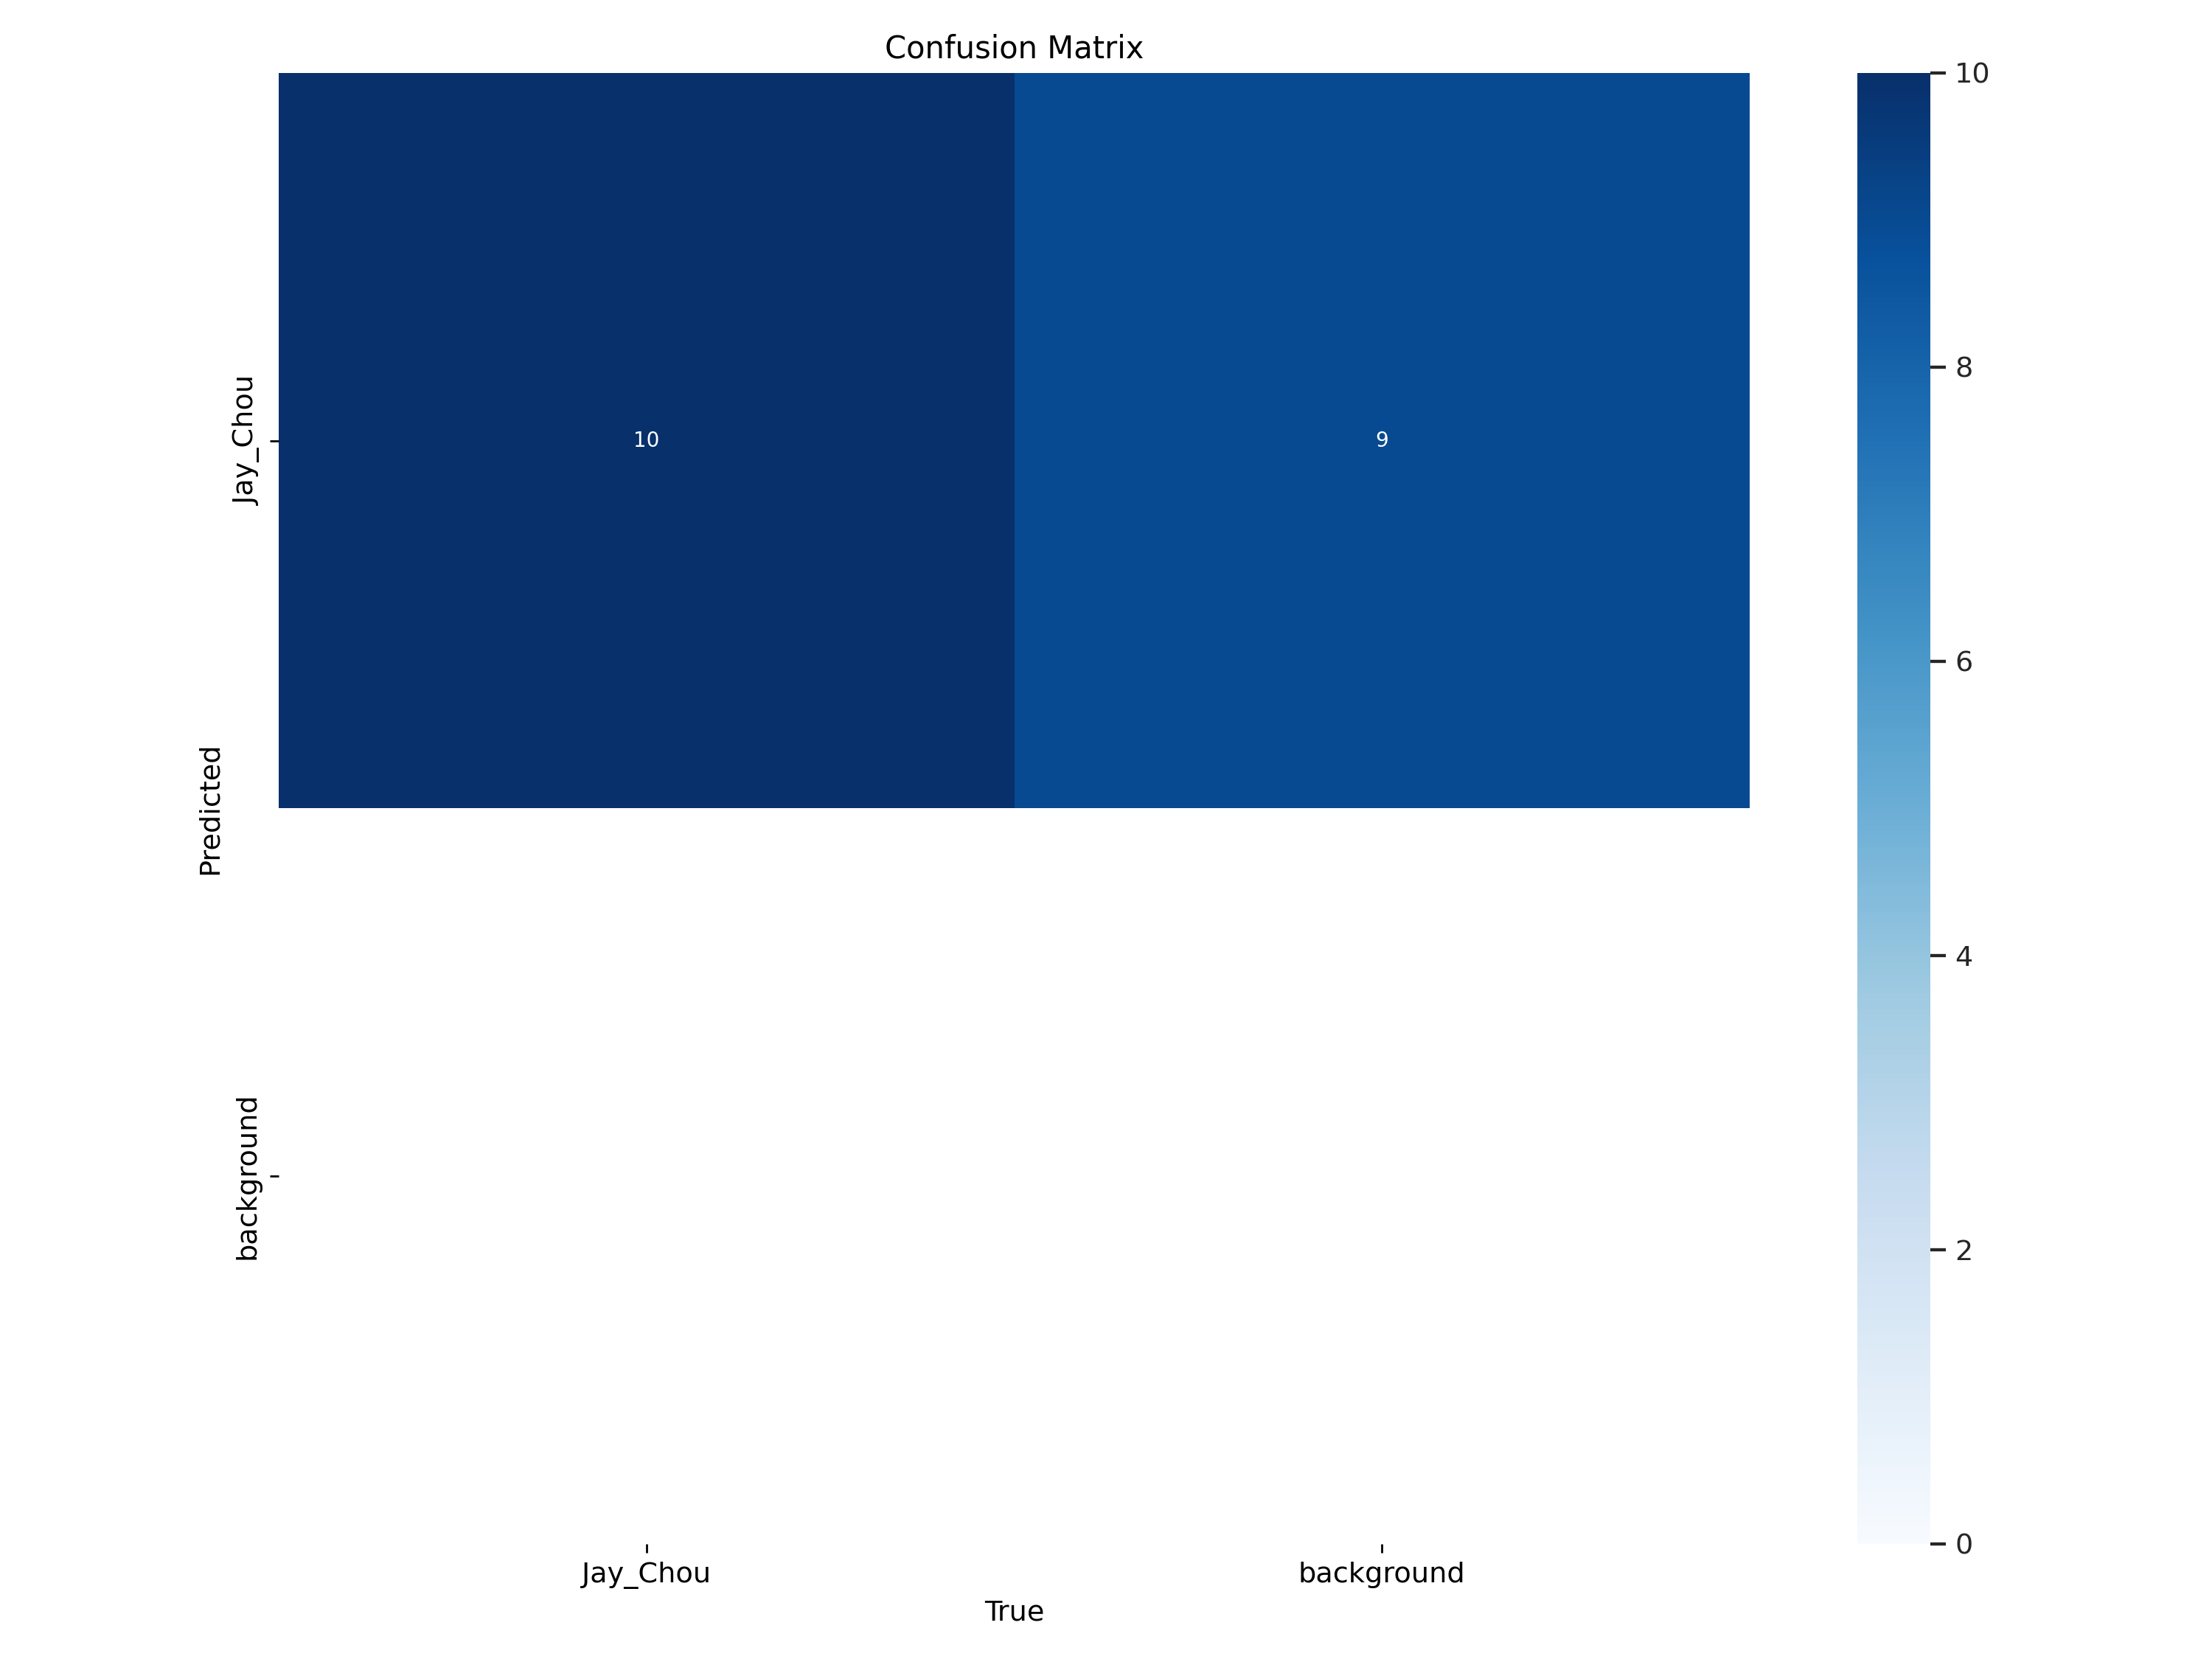

In [ ]:
# Confusion Matrix for Training a Model with SGD Optimizer
Image(filename=f'/content/runs/detect/train10/confusion_matrix.png', width=600)

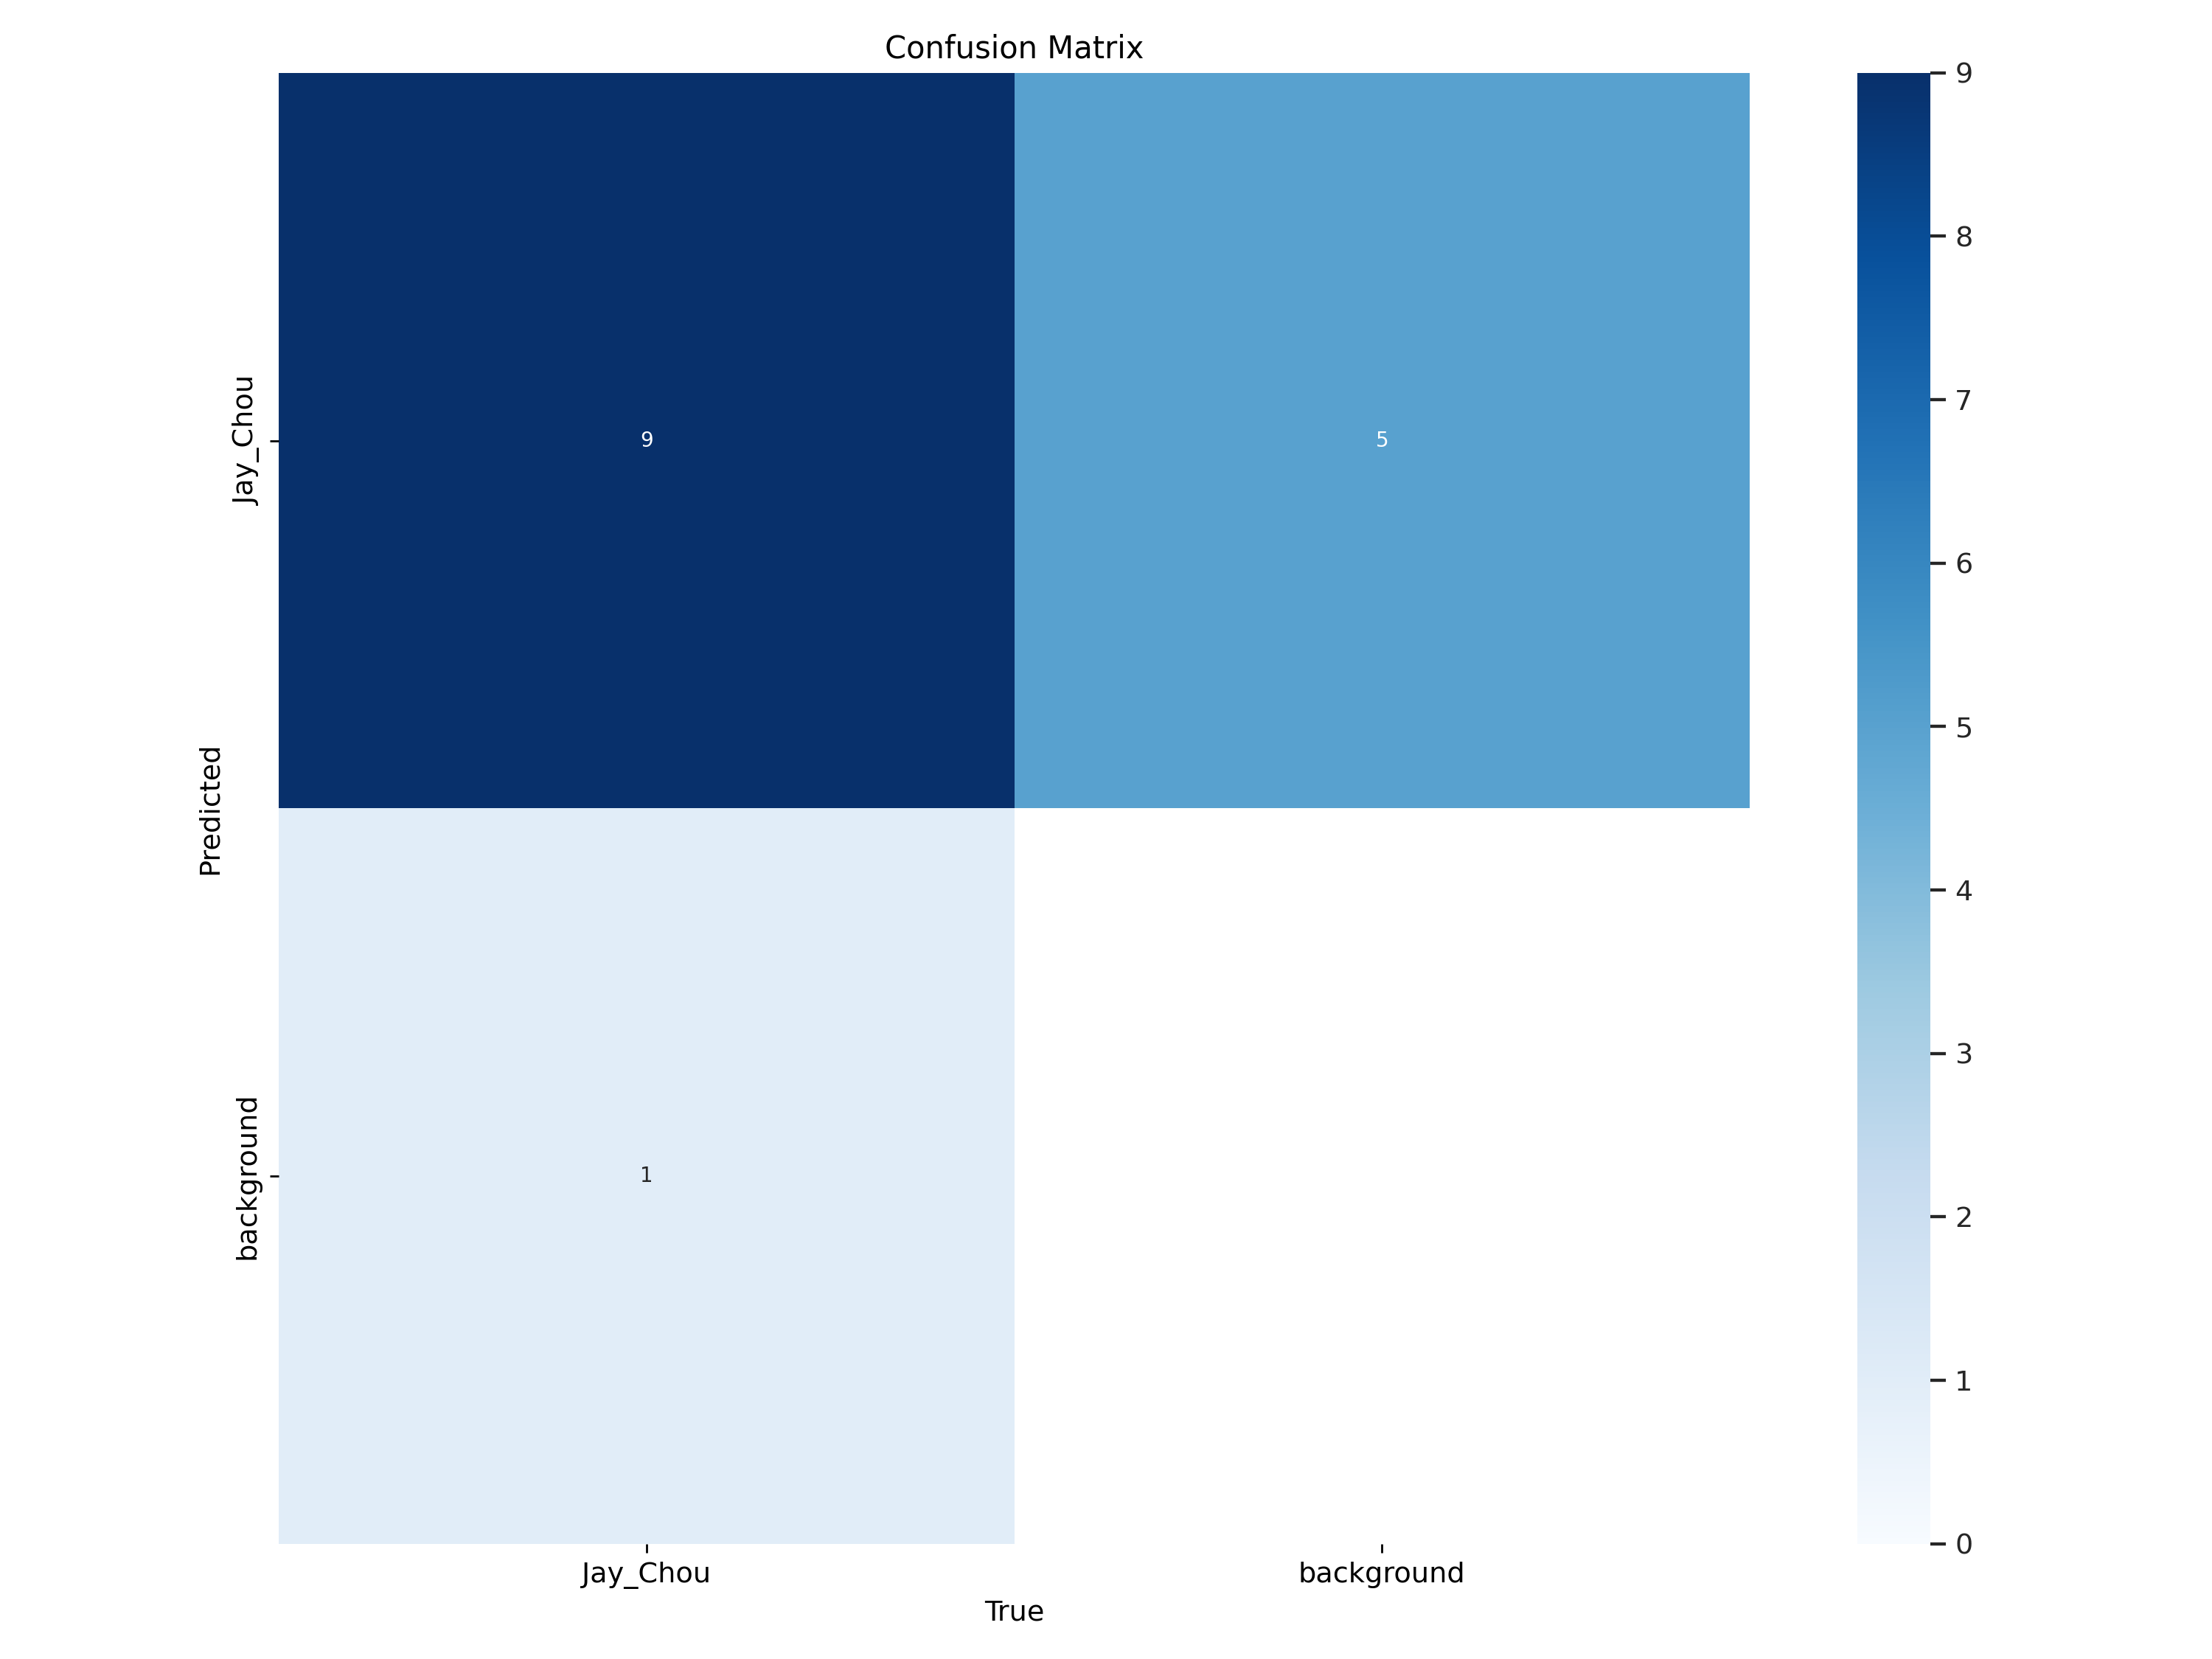

In [ ]:
# Confusion Matrix for Training a Model with AdamW optimizer
Image(filename=f'/content/runs/detect/train11/confusion_matrix.png', width=600)

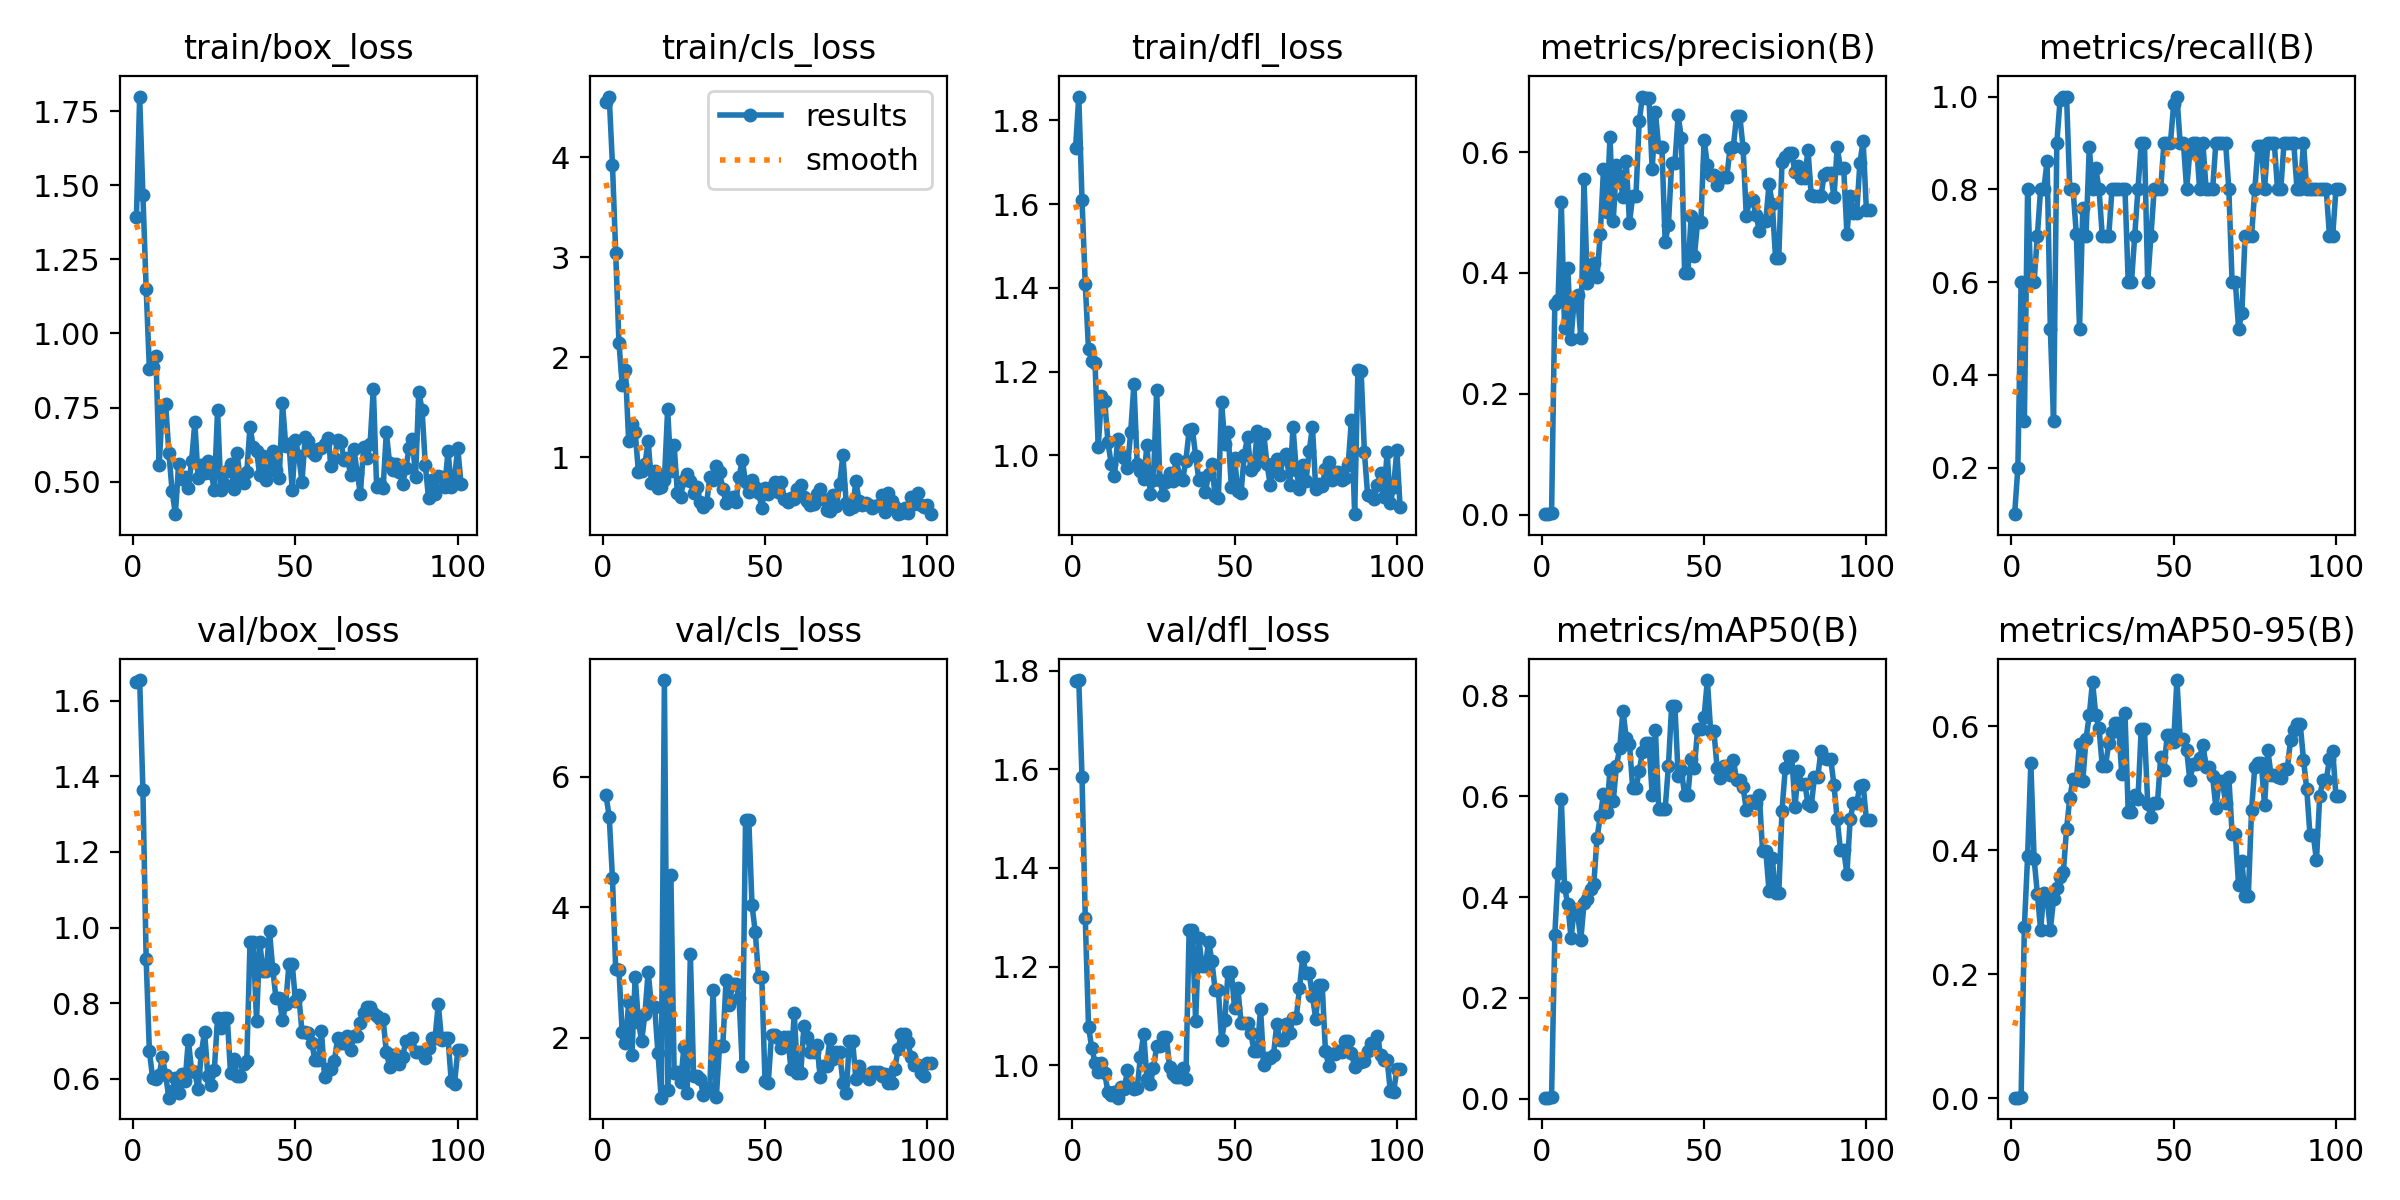

In [ ]:
# Using the SGD Optimizer, all training results (loss, mAP, recall, precision)
Image(filename=f'/content/runs/detect/train10/results.png', width=600)

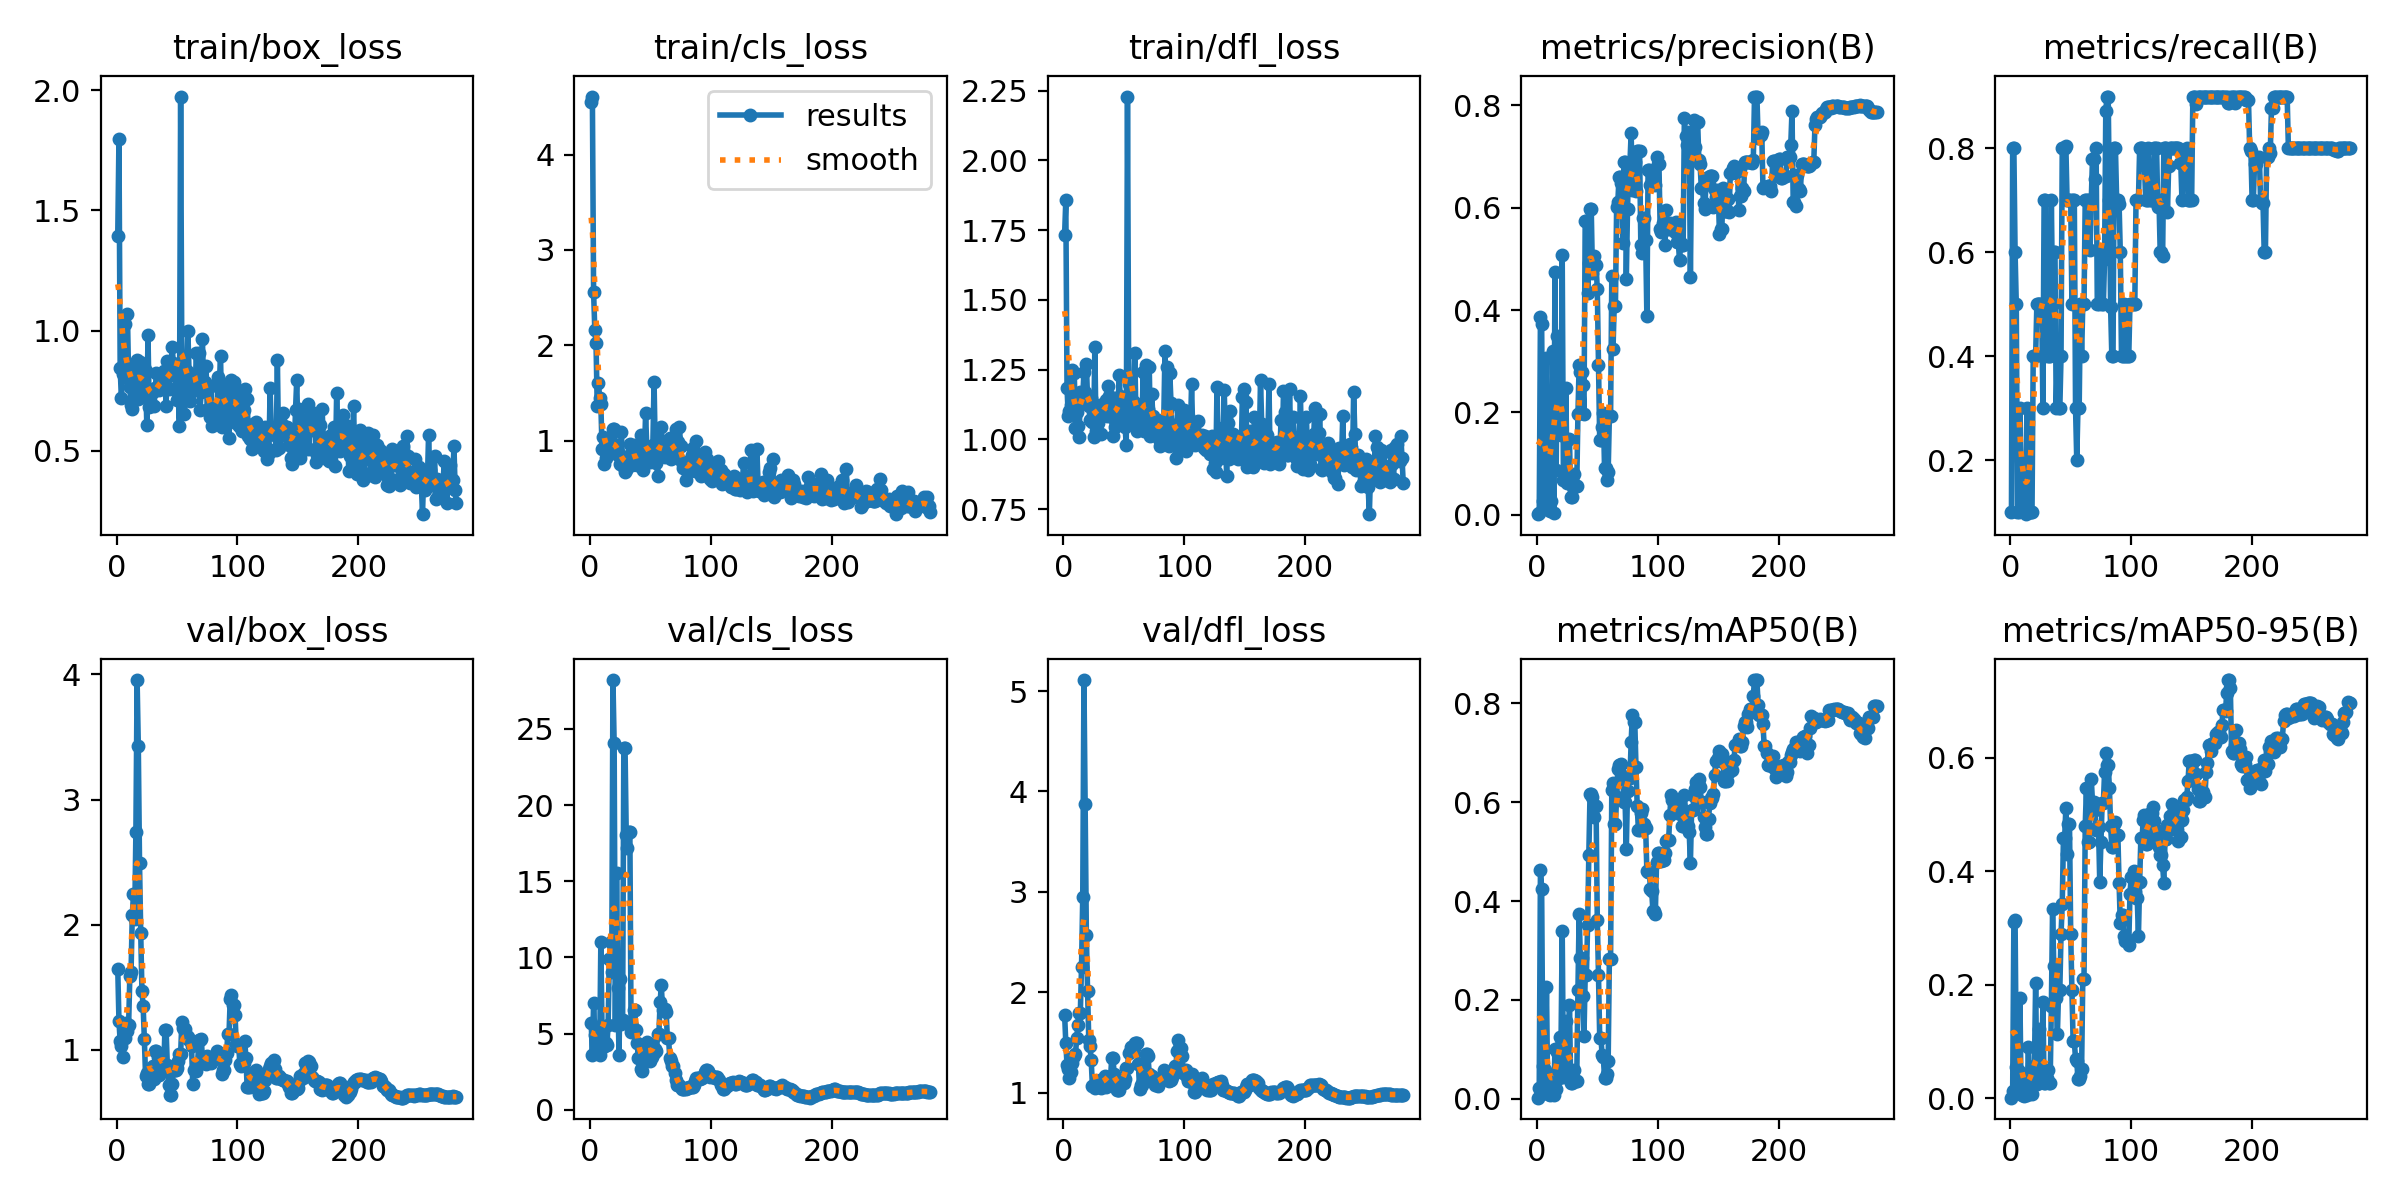

In [ ]:
# Using the AdamW optimizer, all training results (loss, mAP, recall, precision)
Image(filename=f'/content/runs/detect/train11/results.png', width=600)

In [ ]:
# Matrix of Validation Results Using the SGD Optimizer
!yolo task=detect mode=val model=/content/runs/detect/train10/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Jay-Chou-1/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.08s/it]
                   all         10         10      0.578          1       0.83      0.669
Speed: 1.6ms preprocess, 35.1ms inference, 0.0ms loss, 56.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
# Matrix of Validation Results Using the AdamW Optimizer
!yolo task=detect mode=val model=/content/runs/detect/train11/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Jay-Chou-1/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.01it/s]
                   all         10         10      0.816      0.888      0.847      0.744
Speed: 0.3ms preprocess, 35.5ms inference, 0.0ms loss, 51.1ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


### Comparing the results of the two optimizers, SGD and AdamW, for an object detection model, we can draw the following conclusions:

1. **Precision (Box(P)):**
   - AdamW: Has a higher precision (0.816) compared to SGD (0.578). This indicates that AdamW is more accurate in predicting the relevant objects.

2. **Recall (R):**
   - SGD: Has a perfect recall (1.0), meaning it found all relevant instances. However, this could potentially include false positives given the lower precision.
   - AdamW: Has a slightly lower recall (0.888), suggesting it missed some instances but had fewer false positives given the higher precision.

3. **Mean Average Precision (mAP):**
   - mAP50: Reflects the mean average precision at an IoU threshold of 50%.
     - AdamW (0.847) outperforms SGD (0.83), although both are relatively high, indicating good model performance.
   - mAP50-95: Is the average mAP calculated over multiple IoU thresholds from 0.5 to 0.95.
     - AdamW (0.744) again has a higher mAP over these ranges compared to SGD (0.669), showing it is more consistent across different IoU thresholds.

4. **Speed:**
   - Preprocessing: AdamW is faster (0.3ms) than SGD (1.6ms), which might be advantageous for datasets requiring significant preprocessing.
   - Inference: Both optimizers perform similarly in inference time, with AdamW being slightly slower (35.5ms) compared to SGD (35.1ms).
   - Loss and Postprocess: Both optimizers report no time spent on loss calculations (0.0ms). AdamW is faster in postprocessing (51.1ms) compared to SGD (56.4ms).

Overall, AdamW appears to provide a better balance between precision and recall, resulting in higher mAP scores, suggesting that it might be a more effective optimizer for this particular object detection task. Additionally, AdamW shows slightly faster preprocessing and postprocessing times, which could lead to faster overall model training and evaluation cycles.

In [ ]:
# Making predictions using video.
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.9 source=/content/videoplayback.avi
# You can find the video clip here, https://drive.google.com/file/d/1nbPaa0F4fpwTli7D9Mwb0POVAvKEJxhY/view?usp=sharing

In [ ]:
# Compress and download files in Colab.
!zip -r folder_name.zip /content/runs/detect/predict

updating: content/runs/detect/predict/ (stored 0%)
updating: content/runs/detect/predict/videoplayback.avi (deflated 1%)
